In [1]:
import pandas as pd

In [2]:
import seaborn as sns



In [3]:
# from statsmodels.stats.power import tt_ind_solve_power
# p = 0.05
# min_effect = 0.05
# from statsmodels.stats.power import tt_ind_solve_power

# tt_ind_solve_power(effect_size=p*min_effect/0.05, nobs1 = 1000, alpha=None, power=0.8, ratio=1, alternative='two-sided')

In [4]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import f1_score, roc_auc_score, precision_score, classification_report, precision_recall_curve, confusion_matrix
from scipy.stats import mannwhitneyu
import itertools

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
!wget 'https://drive.google.com/uc?export=download&id=101fYypHh0u56KC5Lq2ywOCOdnh7WPho2' -O data.zip

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"id" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [6]:
!unzip data.zip

"unzip" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [7]:
marketing_campaign = pd.read_csv('marketing_campaign.csv')
marketing_campaign

,user_id,date_served,marketing_channel,variant,language_displayed,converted
0,a1000,1/1/18,House Ads,personalization,English,True
1,a1001,1/1/18,House Ads,personalization,English,True
2,a1002,1/1/18,House Ads,personalization,English,True
3,a1003,1/1/18,House Ads,personalization,English,True
4,a1004,1/1/18,House Ads,personalization,English,True
...,...,...,...,...,...,...
10032,a11032,1/17/18,Email,control,German,True
10033,a11033,1/17/18,Email,control,German,True
10034,a11034,1/5/18,Instagram,control,German,False
10035,a11035,1/17/18,Email,control,German,True


In [8]:
marketing_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             10037 non-null  object
 1   date_served         10021 non-null  object
 2   marketing_channel   10022 non-null  object
 3   variant             10037 non-null  object
 4   language_displayed  10037 non-null  object
 5   converted           10022 non-null  object
dtypes: object(6)
memory usage: 470.6+ KB


In [9]:
marketing_campaign.variant.value_counts()

control            5091
personalization    4946
Name: variant, dtype: int64

In [10]:
marketing_campaign.converted.value_counts()

False    8946
True     1076
Name: converted, dtype: int64

In [11]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [12]:
age_no_na = marketing_campaign[marketing_campaign["converted"].isna()]
age_no_na

,user_id,date_served,marketing_channel,variant,language_displayed,converted
9944,a10944,NaN,NaN,control,English,NaN
9945,a10945,NaN,NaN,control,English,NaN
9946,a10946,NaN,NaN,control,English,NaN
9947,a10947,NaN,NaN,control,English,NaN
9948,a10948,NaN,NaN,control,English,NaN
9949,a10949,NaN,NaN,control,English,NaN
9950,a10950,NaN,NaN,control,English,NaN
9951,a10951,NaN,NaN,control,English,NaN
9952,a10952,NaN,NaN,control,English,NaN
9953,a10953,NaN,NaN,control,English,NaN


In [13]:
marketing_campaign.drop(labels = [9944, 9945, 9946, 9947,9948,9949,9950, 9951, 9952, 9953, 9954, 9955, 9956, 9957, 9958 ],axis = 0, inplace = True)

In [14]:
marketing_campaign["date_served"] = marketing_campaign["date_served"].fillna(0)

In [15]:
marketing_campaign["date_served"] = pd.to_numeric(marketing_campaign["date_served"].str.replace("/", "")).astype(float)

In [16]:
marketing_campaign["date_served"]=pd.to_numeric(marketing_campaign["date_served"], downcast='integer')

In [17]:
marketing_campaign["date_served"] = marketing_campaign["date_served"].fillna(0)

In [18]:
marketing_campaign['converted'] = marketing_campaign['converted'].replace({'True':1, 'False':0}).astype(int)

In [19]:
marketing_campaign['variant'] = marketing_campaign['variant'].replace({'personalization':1, 'control':0}).astype(int)

In [20]:
categorical_col =  ['date_served',  'marketing_channel', 'language_displayed', 'variant', 'converted']

for i in categorical_col:
    print(i,' число уникальных значений: ', len(pd.unique(marketing_campaign[i])), 'уникальные значения', pd.unique(marketing_campaign[i]))

date_served  число уникальных значений:  32 уникальные значения [ 1118.  1218.  1318.  1418.  1518.  1618.  1718.  1818.  1918. 11018.
 11118. 11218. 11318. 11418. 11518. 11618. 11718. 11818. 11918. 12018.
 12118. 12218. 12318. 12418. 12518. 12618. 12718. 12818. 12918. 13018.
 13118.     0.]
marketing_channel  число уникальных значений:  5 уникальные значения ['House Ads' 'Push' 'Facebook' 'Instagram' 'Email']
language_displayed  число уникальных значений:  4 уникальные значения ['English' 'German' 'Arabic' 'Spanish']
variant  число уникальных значений:  2 уникальные значения [1 0]
converted  число уникальных значений:  2 уникальные значения [1 0]


In [21]:
# разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(marketing_campaign.drop(['converted'],axis=1), marketing_campaign['converted'], random_state=2) # X_test для А/В
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=2)# X_val - наш внутренний тест

In [22]:
# соберем наш простой pipeline, но нам понадобится написать класс для выбора нужного поля
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.column]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    

class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in self.columns:
            if col_ not in test_columns:
                X[col_] = 0
        return X[self.columns]


class OHEEncoderBin(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        B = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        self.columns = B[:1]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
    
        return X[self.columns]  


class NumericPower(BaseEstimator, TransformerMixin):
    def __init__(self, key, p=2):
        self.key = key
        self.columns = []
        self.p = p+1

    def fit(self, X, y=None):
        B = [self.key + str(i) for i in range(1, self.p)]
        self.columns = B + ['log']
        return self

    def transform(self, X):
        Xp = X.values.reshape(-1,1)
        for i in range(2, self.p):
            Xp = np.hstack([Xp,(X.values.reshape(-1,1) ** i).astype(float)])

        Xp = np.hstack([Xp, np.log(X.values.reshape(-1,1) + 1).astype(float)])    
        B = pd.DataFrame(data = Xp, index = X.index, columns =[self.columns] )
        return B[self.columns]     

In [23]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 8966 to 5245
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             5637 non-null   object 
 1   date_served         5637 non-null   float64
 2   marketing_channel   5637 non-null   object 
 3   variant             5637 non-null   int32  
 4   language_displayed  5637 non-null   object 
dtypes: float64(1), int32(1), object(3)
memory usage: 242.2+ KB


In [24]:
X_train.describe()

,date_served,variant
count,5637.000000,5637.000000
mean,8804.390279,0.499379
std,4876.161997,0.500044
min,0.000000,0.000000
25%,1818.000000,0.000000
50%,11518.000000,0.000000
75%,12218.000000,1.000000
max,13118.000000,1.000000


In [25]:
X_train.head(3)

,user_id,date_served,marketing_channel,variant,language_displayed
8966,a9966,1418.0,House Ads,1,English
869,a1869,1518.0,House Ads,0,English
3156,a4156,11218.0,House Ads,0,English


In [26]:
X_train.columns

Index(['user_id', 'date_served', 'marketing_channel', 'variant',
       'language_displayed'],
      dtype='object')

In [27]:
X_train.columns

Index(['user_id', 'date_served', 'marketing_channel', 'variant',
       'language_displayed'],
      dtype='object')

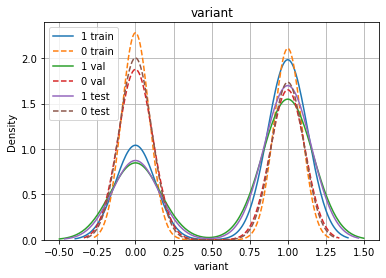

In [28]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
for i in X_train.iloc[:,2:].select_dtypes(include=numerics).columns:
    sns.kdeplot(X_train.loc[y_train == 1,i], label='1 train')
    sns.kdeplot(X_train.loc[y_train == 0,i], ls='--', label='0 train')
    
    sns.kdeplot(X_val.loc[y_val == 1,i], label='1 val')
    sns.kdeplot(X_val.loc[y_val == 0,i], ls='--', label='0 val')
    
    sns.kdeplot(X_test.loc[y_test == 1,i], label='1 test')
    sns.kdeplot(X_test.loc[y_test == 0,i], ls='--', label='0 test')
    plt.title(i)
    plt.grid()
    plt.legend()
    plt.show()  

In [29]:
categorical_col =  ['user_id', 'marketing_channel', 'language_displayed', 'variant']

for i in categorical_col:
    print(i,' число уникальных значений: ', len(pd.unique(X_train[i])), 'уникальные значения', pd.unique(X_train[i]))

user_id  число уникальных значений:  5637 уникальные значения ['a9966' 'a1869' 'a4156' ... 'a4495' 'a1101' 'a6245']
marketing_channel  число уникальных значений:  5 уникальные значения ['House Ads' 'Instagram' 'Facebook' 'Email' 'Push']
language_displayed  число уникальных значений:  4 уникальные значения ['English' 'Spanish' 'German' 'Arabic']
variant  число уникальных значений:  2 уникальные значения [1 0]


In [30]:
categorical_columns = ['user_id', 'marketing_channel', 'language_displayed']
continuous_columns = ['date_served']
categorical_bin_columns = ['variant']


from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

gender = Pipeline([
                ('selector', FeatureSelector(column='variant')),
                ('ohe', OHEEncoderBin(key='variant'))
            ])

gender.fit(X_train)
gender.transform(X_test).head(10)

,variant_0
3759,1
5408,1
8942,0
1080,1
8638,0
9253,0
1873,1
1177,0
4320,1
6911,0


In [31]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion



In [32]:
final_transformers = list()

for cat_col in categorical_columns:
    cat_transformer = Pipeline([
                ('selector', FeatureSelector(column=cat_col)),
                ('ohe', OHEEncoder(key=cat_col))
                
            ])
    final_transformers.append((cat_col, cat_transformer))


for cont_col in continuous_columns:
    cont_transformer = Pipeline([
                ('selector', NumberSelector(key=cont_col)),
                ('pow_2', NumericPower(key=cont_col, p=1)),
                ('Scale', StandardScaler())
            ])
    final_transformers.append((cont_col, cont_transformer))


for bin_col in categorical_bin_columns:
    bin_transformer = Pipeline([
                ('selector', FeatureSelector(column=bin_col)),
                ('ohe', OHEEncoderBin(key=bin_col))
            ])
    final_transformers.append((bin_col, bin_transformer))

In [33]:
final_transformers

[('user_id',
  Pipeline(steps=[('selector', FeatureSelector(column='user_id')),
                  ('ohe', OHEEncoder(key='user_id'))])),
 ('marketing_channel',
  Pipeline(steps=[('selector', FeatureSelector(column='marketing_channel')),
                  ('ohe', OHEEncoder(key='marketing_channel'))])),
 ('language_displayed',
  Pipeline(steps=[('selector', FeatureSelector(column='language_displayed')),
                  ('ohe', OHEEncoder(key='language_displayed'))])),
 ('date_served',
  Pipeline(steps=[('selector', NumberSelector(key='date_served')),
                  ('pow_2', NumericPower(key='date_served')),
                  ('Scale', StandardScaler())])),
 ('variant',
  Pipeline(steps=[('selector', FeatureSelector(column='variant')),
                  ('ohe', OHEEncoderBin(key='variant'))]))]

In [34]:
from sklearn.linear_model import LogisticRegression
feats = FeatureUnion(final_transformers)

feature_processing = Pipeline([('feats', feats)])

pipeline = Pipeline([
    ('features', feats),
    ('classifier', LogisticRegression(random_state=42)),
])

In [35]:
X_train

,user_id,date_served,marketing_channel,variant,language_displayed
8966,a9966,1418.0,House Ads,1,English
869,a1869,1518.0,House Ads,0,English
3156,a4156,11218.0,House Ads,0,English
4263,a5263,13118.0,House Ads,0,English
3273,a4273,12518.0,House Ads,0,English
...,...,...,...,...,...
3918,a4918,1818.0,Push,0,English
7802,a8802,1518.0,House Ads,1,English
3495,a4495,11018.0,Facebook,0,English
101,a1101,1518.0,House Ads,0,English


In [36]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('user_id',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelector(column='user_id')),
                                                                 ('ohe',
                                                                  OHEEncoder(key='user_id'))])),
                                                ('marketing_channel',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelector(column='marketing_channel')),
                                                                 ('ohe',
                                                                  OHEEncoder(key='marketing_channel'))])),
                                                ('language_displayed',
                                                 P

In [37]:
# наши прогнозы для тестовой выборки
preds = pipeline.predict_proba(X_val)[:, 1]
preds[:10]

array([0.076174  , 0.08708569, 0.0463954 , 0.05512739, 0.04790195,
       0.07409423, 0.06908255, 0.19582059, 0.10921549, 0.08661956])

In [38]:
precision, recall, thresholds = precision_recall_curve(y_val, preds)

fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))


Best Threshold=0.136335, F-Score=0.350, Precision=0.249, Recall=0.586


In [39]:
feats = FeatureUnion(final_transformers)

pipeline = Pipeline([
    ('features', feats),
    ('classifier', RandomForestClassifier(random_state=42)),
])

In [40]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('user_id',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelector(column='user_id')),
                                                                 ('ohe',
                                                                  OHEEncoder(key='user_id'))])),
                                                ('marketing_channel',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelector(column='marketing_channel')),
                                                                 ('ohe',
                                                                  OHEEncoder(key='marketing_channel'))])),
                                                ('language_displayed',
                                                 P

In [41]:
# наши прогнозы для тестовой выборки
preds = pipeline.predict_proba(X_val)[:, 1]
preds[:10]

array([0.02, 0.  , 0.  , 0.  , 0.03, 0.02, 0.  , 0.04, 0.05, 0.06])

In [42]:
precision, recall, thresholds = precision_recall_curve(y_val, preds)

fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))


Best Threshold=0.070000, F-Score=0.330, Precision=0.264, Recall=0.439


In [43]:
from sklearn.ensemble import GradientBoostingClassifier
feats = FeatureUnion(final_transformers)

pipeline = Pipeline([
    ('features', feats),
    ('classifier', RandomForestClassifier(random_state=42)),
])

In [44]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('user_id',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelector(column='user_id')),
                                                                 ('ohe',
                                                                  OHEEncoder(key='user_id'))])),
                                                ('marketing_channel',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelector(column='marketing_channel')),
                                                                 ('ohe',
                                                                  OHEEncoder(key='marketing_channel'))])),
                                                ('language_displayed',
                                                 P

In [45]:
# наши прогнозы для тестовой выборки
preds = pipeline.predict_proba(X_val)[:, 1]
preds[:10]

array([0.02, 0.  , 0.  , 0.  , 0.03, 0.02, 0.  , 0.04, 0.05, 0.06])

In [46]:
precision, recall, thresholds = precision_recall_curve(y_val, preds)

fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))


Best Threshold=0.070000, F-Score=0.330, Precision=0.264, Recall=0.439


Confusion matrix, without normalization
[[1438  243]
 [ 111   87]]


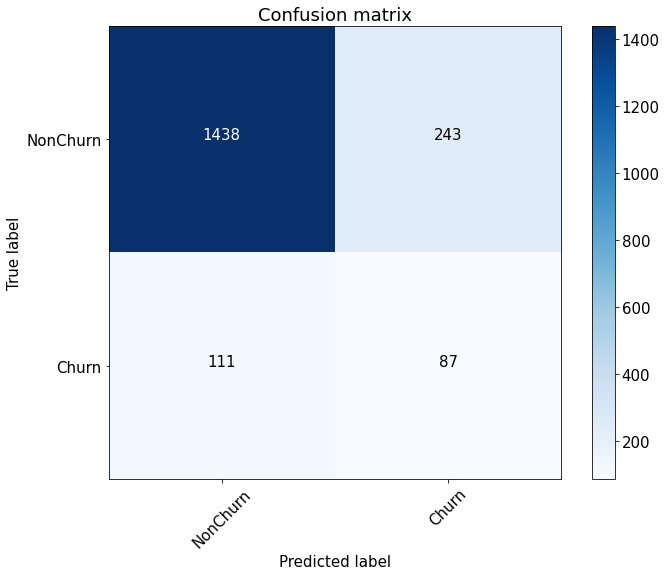

In [47]:
#мы уже нашли ранее "оптимальный" порог, когда максимизировали f_score
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_val, preds >= thresholds[ix])
TN = cnf_matrix[0][0]
FN = cnf_matrix[1][0]
TP = cnf_matrix[1][1]
FP = cnf_matrix[0][1]

plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['NonChurn', 'Churn'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [48]:

TN = cnf_matrix[0][0]
FN = cnf_matrix[1][0]
TP = cnf_matrix[1][1]
FP = cnf_matrix[0][1]

C0 = (TP + FN) / np.sum(cnf_matrix)
C0

0.10537519957424162

A/b тест 

In [49]:
X_A, X_B, y_A, y_B = train_test_split(X_test, y_test, test_size=0.5, random_state=2)

In [50]:
predsB = pipeline.predict_proba(X_B)[:, 1]
cnf_matrix = confusion_matrix(y_B, predsB > thresholds[ix])

TN = cnf_matrix[0][0]
FN = cnf_matrix[1][0]
TP = cnf_matrix[1][1]
FP = cnf_matrix[0][1]
print(cnf_matrix)

[[982 141]
 [ 85  45]]


In [51]:
churn_ef = 0.5  # Снижение эффективности предсказания 
C0_A = (np.sum(y_A)) / y_A.shape[0] # churn rate (коэффициента оттока клиентов) без ML
print(C0_A)
C1_MLB = (FN + (1-churn_ef) * TP) / np.sum(cnf_matrix) # churn rate
print(C1_MLB)

0.11013567438148444
0.08579409417398244


In [52]:
y_churnA = y_A

y_pred = (predsB > thresholds[ix])
ind_churn = np.where((y_pred != y_B) & (y_B == 1))
y_churnB = np.zeros(y_B.shape)
y_churnB[ind_churn] = 1


k1, n1 = np.sum(y_A), y_A.shape[0]
k2, n2 = np.sum(y_churnB), y_churnB.shape[0]
k1, k2, n1, n2

(138, 85.0, 1253, 1253)

In [53]:
from statsmodels.stats import proportion

z_score, z_pvalue = proportion.proportions_ztest(np.array([k1, k2]), 
                                                 np.array([n1, n2]))

print(f'Results are z_score={z_score:.3f} pvalue={z_pvalue:.3f}')

Results are z_score=3.718 pvalue=0.000


In [54]:
chisq, pvalue, table = proportion.proportions_chisquare(np.array([k1, k2]), 
                                                        np.array([n1, n2]))

print(f'Results are chisq={chisq:.3f} pvalue={pvalue:.3f}')

Results are chisq=13.827 pvalue=0.000


In [55]:
###В варианте personalization	 конверсия будет больше, оличие стат. значимое

In [56]:
# Второй вариант

In [57]:
data = pd.read_csv("marketing_campaign.csv")
data.head(3)

,user_id,date_served,marketing_channel,variant,language_displayed,converted
0,a1000,1/1/18,House Ads,personalization,English,True
1,a1001,1/1/18,House Ads,personalization,English,True
2,a1002,1/1/18,House Ads,personalization,English,True


In [58]:
age_no_na = data[data["converted"].isna()]
age_no_na

,user_id,date_served,marketing_channel,variant,language_displayed,converted
9944,a10944,NaN,NaN,control,English,NaN
9945,a10945,NaN,NaN,control,English,NaN
9946,a10946,NaN,NaN,control,English,NaN
9947,a10947,NaN,NaN,control,English,NaN
9948,a10948,NaN,NaN,control,English,NaN
9949,a10949,NaN,NaN,control,English,NaN
9950,a10950,NaN,NaN,control,English,NaN
9951,a10951,NaN,NaN,control,English,NaN
9952,a10952,NaN,NaN,control,English,NaN
9953,a10953,NaN,NaN,control,English,NaN


In [59]:
data.drop(labels = [9944,9945, 9946, 9947,9948,9949,9950, 9951, 9952, 9953, 9954, 9955, 9956, 9957, 9958 ],axis = 0, inplace = True)

In [60]:
data["date_served"] = data["date_served"].fillna(0)

In [61]:
data["date_served"] = pd.to_numeric(data["date_served"].str.replace("/", "")).astype(float)

In [62]:
data['converted'] = data['converted'].replace({'True':1, 'False':0}).astype(str)

In [63]:
data['variant'] = data['variant'].replace({'personalization':1, 'control':0}).astype(float)

In [64]:
data.head(3)

,user_id,date_served,marketing_channel,variant,language_displayed,converted
0,a1000,1118.0,House Ads,1.0,English,True
1,a1001,1118.0,House Ads,1.0,English,True
2,a1002,1118.0,House Ads,1.0,English,True


In [65]:
data[data['converted'] == 'False'].describe()

,date_served,variant
count,8945.000000,8946.000000
mean,8810.632756,0.474067
std,4879.387211,0.499355
min,1118.000000,0.000000
25%,1818.000000,0.000000
50%,11518.000000,0.000000
75%,12318.000000,1.000000
max,13118.000000,1.000000


In [66]:
data[data['converted'] == 'True'].describe()

,date_served,variant
count,1076.000000,1076.000000
mean,8483.241636,0.655204
std,4879.466234,0.475523
min,1118.000000,0.000000
25%,1718.000000,0.000000
50%,11518.000000,1.000000
75%,11818.000000,1.000000
max,13118.000000,1.000000


In [67]:
data.head(3)

,user_id,date_served,marketing_channel,variant,language_displayed,converted
0,a1000,1118.0,House Ads,1.0,English,True
1,a1001,1118.0,House Ads,1.0,English,True
2,a1002,1118.0,House Ads,1.0,English,True


In [68]:
data['variant'].value_counts()

0.0    5076
1.0    4946
Name: variant, dtype: int64

In [69]:
import numpy as np


#z_crit_value = 1.96 # соответствует доверительному интервалу в 95%
k1 = data[data['converted']=='True']['variant'].sum()
n1 = data[data['converted']=='True'].shape[0]
k2 = data[data['converted']=='False']['variant'].sum()
n2 = data[data['converted']=='False'].shape[0]

k1, n1, k2, n2

(705.0, 1076, 4241.0, 8946)

In [70]:
grouped = data.pivot_table(values='variant', index='converted', aggfunc=['sum', 'count'])
grouped

,sum,count
,variant,variant
converted,,
False,4241.0,8946
True,705.0,1076


In [71]:
p1, p2 = k1/n1, k2/n2
p1, p2

(0.6552044609665427, 0.4740666219539459)

In [72]:
P = (p1*n1 + p2*n2) / (n1 + n2)
z = (p1 - p2) / (P * (1 - P) * (1/n1 + 1/n2))**(1/2)
z

11.22843169260453

In [73]:
from statsmodels.stats import proportion

z_score, z_pvalue = proportion.proportions_ztest(np.array([k1, k2]), 
                                                 np.array([n1, n2]))

print(f'Results are z_score={z_score:.3f} pvalue={z_pvalue:.3f}')

Results are z_score=11.228 pvalue=0.000


In [74]:
grouped

,sum,count
,variant,variant
converted,,
False,4241.0,8946
True,705.0,1076


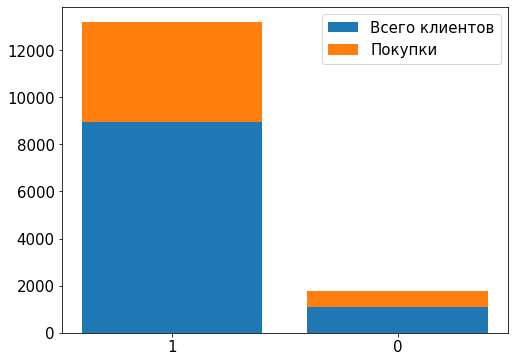

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar([1, 2], grouped['count']['variant'], label='Всего клиентов')
plt.bar([1, 2], grouped['sum']['variant'], bottom=grouped['count']['variant'], label='Покупки')
plt.xticks([1, 2], ['1', '0'])
plt.legend();

In [76]:
chisq, pvalue, table = proportion.proportions_chisquare(np.array([k1, k2]), 
                                                        np.array([n1, n2]))

print(f'Results are chisq={chisq:.3f} pvalue={pvalue:.3f}')

Results are chisq=126.078 pvalue=0.000
